In [24]:
import os
import json
import numpy as np
import pandas as pd
import re
from datetime import datetime
from scipy.ndimage import laplace
from skimage.io import imread
import matplotlib.pyplot as plt

In [2]:
def logistic(t, A, mu, l):
    log_B = A / (1 + np.exp(4 * mu / A * (l - t) + 2))
    return log_B

In [15]:
def extract_array(s):
    numbers = re.findall(r"[-+]?\d*\.?\d+e[-+]?\d+|[-+]?\d*\.?\d+", s)
    return np.array([float(num) for num in numbers])

In [9]:
df = pd.read_excel('../data_processed.xlsx')

In [10]:
df_pos = df[(df.Date == '2023-11-28') &
            (df.Machine == 'Tweez scope') &
            (df.Position == 5)]
df_pos

,Date,Machine,Position,Strain,DNA,Chemical,Pad,Dilution,t_incub,t_im,...,rad_max_um,gompertz_params_um,logistic_params_um,gomp_params_px,gompertz_params_px,logistic_params_px,t_m_gomp_px,t_m_gomp_um,t_m_logistic_px,t_m_logistic_um
27,2023-11-28,Tweez scope,5,MG1655,pAAA,-,1,10^(-5),09:50:00,15:37:00,...,325.572056,"{""A"": 12.707678255621241, ""mu_m"": 0.0237365258...","{""A"": 12.656971349085106, ""mu_m"": 0.0217013978...","{""A"": 12.106855143353185, ""mu_m"": 0.0227599420...","{""A"": 12.106855143353185, ""mu_m"": 0.0227599420...","{""A"": 12.063403838846387, ""mu_m"": 0.0202303782...",214.350314,201.597058,298.150724,291.6165


In [52]:
for i in [27]:
    print(i)
    # Fit the model
    incub_time_s = datetime.strptime(df.loc[i,'t_im'], '%H:%M:%S') - datetime.strptime(df.loc[i,'t_incub'], '%H:%M:%S')
    incub_time_n = incub_time_s.seconds / 60
    #area = extract_array(df.loc[i,'area'])
    area = extract_array(df.loc[i,'area_px']) #* df.loc[i,'um_px']**2
    time_points = np.arange(0, df.loc[i, 'exp length'])*10 + incub_time_n

    # this is for positions i in [146,147,149,152,153] that contain area = 0 then log(a) = inf
    valid_indices = area > 0
    time_points = time_points[valid_indices]
    area = area[valid_indices]

27


In [63]:
log_px = json.loads(df_pos.loc[27,'logistic_params_px'])
log_A = log_px['A']
log_mu = log_px['mu_m']
log_lambda = log_px['lambda']

In [64]:
time = np.arange(0, time_points[-1], 10, like=time_points)

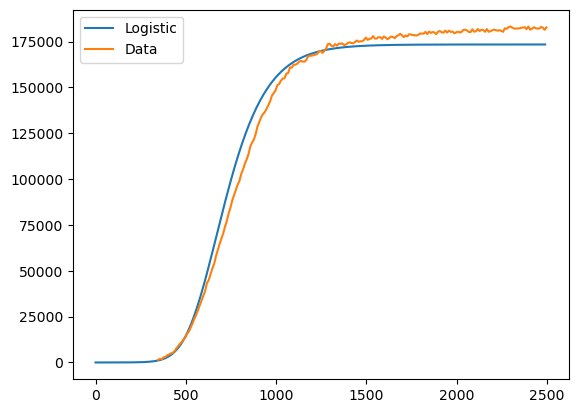

In [65]:
plt.plot(time, np.exp(logistic(time, log_A, log_mu, log_lambda)), label='Logistic')
plt.plot(time_points, area, label='Data')
plt.legend()
plt.show()

In [66]:
#log_params = {"A": 11.364949138901626, "mu_m": 0.02570911423727819, "lambda": 10.42070585368556}
log_A = 11.364949138901626
log_mu = 0.02570911423727819
log_lambda = 10.42070585368556

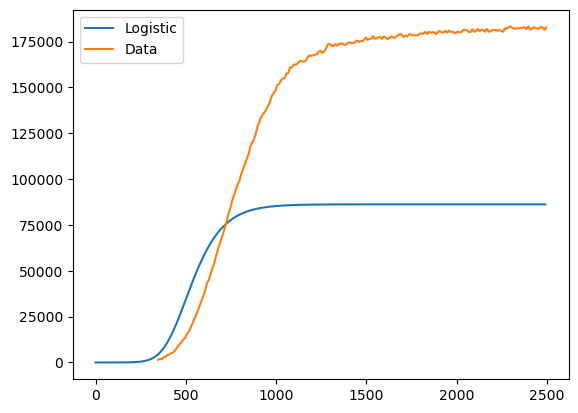

In [67]:
plt.plot(time, np.exp(logistic(time, log_A, log_mu, log_lambda)), label='Logistic')
plt.plot(time_points, area, label='Data')
plt.legend()
plt.show()

In [59]:
 incub_time_

347.0

In [69]:
area

array([  1447.,   2044.,   1701.,   2795.,   3026.,   3877.,   4357.,
         4944.,   5286.,   6097.,   7564.,   8866.,  10066.,  11141.,
        12562.,  13535.,  15707.,  16898.,  19098.,  21244.,  23830.,
        25826.,  28409.,  31065.,  33750.,  36297.,  39027.,  43320.,
        44943.,  48233.,  51312.,  53829.,  57963.,  61197.,  64583.,
        67415.,  70361.,  73966.,  77179.,  81228.,  84314.,  88347.,
        91219.,  94040.,  96938.,  99021., 102799., 105270., 108392.,
       110759., 113544., 117707., 119869., 121512., 124635., 128720.,
       131079., 133748., 135423., 136458., 138303., 140269., 142487.,
       145539., 146902., 148408., 151315., 151851., 153754., 154746.,
       155007., 157569., 157818., 160908., 160818., 162393., 162393.,
       162926., 164014., 164479., 164084., 164035., 164900., 166910.,
       167303., 167254., 167543., 167798., 168175., 169600., 169827.,
       168822., 169803., 171263., 173620., 173740., 172666., 172460.,
       173604., 1727

In [70]:
area.shape

(216,)